In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,f1_score,precision_score,accuracy_score,recall_score
#pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings ("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier



C:\Users\pprat\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Loan_default.csv')

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
def custom_summary(df):
    result = []
    for col in df.columns:
        if df[col].dtype !='object':
            stats = OrderedDict({
                'column_Name':col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quartile_1':df[col].quantile(0.25),
                'mean':df[col].mean(),
                'median':df[col].median(),
                'Quartile_3':df[col].quantile(0.75),
                'maximum':df[col].max(),
                'Variance':round(df[col].var(),2),
                'Standard_devaition':round(df[col].std(),2),
                'skewness':round(df[col].skew(),2),
                'kurtosis':round(df[col].kurt(),2),
                'IQR':df[col].quantile(0.75)-df[col].quantile(0.25)})
            result.append(stats)
            
            if df[col].skew()<-1:
                sk_label = 'Highly Negatively Skewed'
            elif -1 < df[col].skew() < -0.5:
                sk_label = 'Moderatly Negatively Skewed'
            elif -0.5 < df[col].skew() <0:
                sk_label = 'Fairly Negatively Skewed'
            elif 0 < df[col].skew() < 0.5:
                sk_label = 'Fairly Postively Skewed'
            elif 0.5 < df[col].skew() <1:
                sk_label = 'Moderately Postively Skewed'
            elif df[col].skew() > 1:
                sk_label = 'Higly Positively Skewed'
                
            stats['Skewness_Comment'] = sk_label
            
            if df[col].kurt() < -1:
                kurt_label = 'Highly platykurtic'
            elif -1< df[col].kurt() < -0.5:
                kurt_label = 'Moderately Platykurtic'
            elif -0.5< df[col].kurt() < 0.5 :
                kurt_label = 'Mesokurtic'
            elif 0.5 < df[col].kurt() < 1:
                kurt_label ='Moderately Leptokurtic'
            elif df[col].kurt() > 1:
                kurt_label = 'Higly Leptokurtic'
                
            stats['Kurtosis_comment'] = kurt_label
            
                
    result_df = pd.DataFrame(result)
                
    return result_df            
        

In [6]:
custom_summary(df)

,column_Name,Count,Minimum,Quartile_1,mean,median,Quartile_3,maximum,Variance,Standard_devaition,skewness,kurtosis,IQR,Skewness_Comment,Kurtosis_comment
0,Age,255347,18.0,31.00,43.498306,43.00,56.00,69.0,2.247100e+02,14.99,0.0,-1.20,25.00,Fairly Postively Skewed,Highly platykurtic
1,Income,255347,15000.0,48825.50,82499.304597,82466.00,116219.00,149999.0,1.518116e+09,38963.01,-0.0,-1.20,67393.50,Fairly Negatively Skewed,Highly platykurtic
2,LoanAmount,255347,5000.0,66156.00,127578.865512,127556.00,188985.00,249999.0,5.018406e+09,70840.71,-0.0,-1.20,122829.00,Fairly Negatively Skewed,Highly platykurtic
3,CreditScore,255347,300.0,437.00,574.264346,574.00,712.00,849.0,2.525044e+04,158.90,0.0,-1.20,275.00,Fairly Postively Skewed,Highly platykurtic
4,MonthsEmployed,255347,0.0,30.00,59.541976,60.00,90.00,119.0,1.200160e+03,34.64,-0.0,-1.20,60.00,Fairly Negatively Skewed,Highly platykurtic
5,NumCreditLines,255347,1.0,2.00,2.501036,2.00,3.00,4.0,1.250000e+00,1.12,-0.0,-1.36,1.00,Fairly Negatively Skewed,Highly platykurtic
6,InterestRate,255347,2.0,7.77,13.492773,13.46,19.25,25.0,4.404000e+01,6.64,0.0,-1.20,11.48,Fairly Postively Skewed,Highly platykurtic
7,LoanTerm,255347,12.0,24.00,36.025894,36.00,48.00,60.0,2.879600e+02,16.97,-0.0,-1.30,24.00,Fairly Negatively Skewed,Highly platykurtic
8,DTIRatio,255347,0.1,0.30,0.500212,0.50,0.70,0.9,5.000000e-02,0.23,-0.0,-1.20,0.40,Fairly Negatively Skewed,Highly platykurtic
9,Default,255347,0.0,0.00,0.116128,0.00,0.00,1.0,1.000000e-01,0.32,2.4,3.74,0.00,Higly Positively Skewed,Higly Leptokurtic


# here we i have observerd that 
# 1) the minimum age is 18 and max is 69 and the average age is 43
# 2) the min imcome is 15000  and max is 149999 and avg income is 82499
# 3) the min loan amount given by bank is 5000 and max is 249999 while avg is 127578
# 4) min credit score is 300 and max is 849 and avg is 570
# 5) the min loan term is for for 1 year and max is for 5 years 

In [7]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [8]:
#So here we can see that loan ID will not be used in the analysis so we can remove that column

In [9]:
df.drop('LoanID',axis=1,inplace=True)

In [10]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [11]:
numerical_columns = ['Age','Income','CreditScore','LoanAmount','MonthsEmployed','NumCreditLines','LoanTerm','DTIRatio']

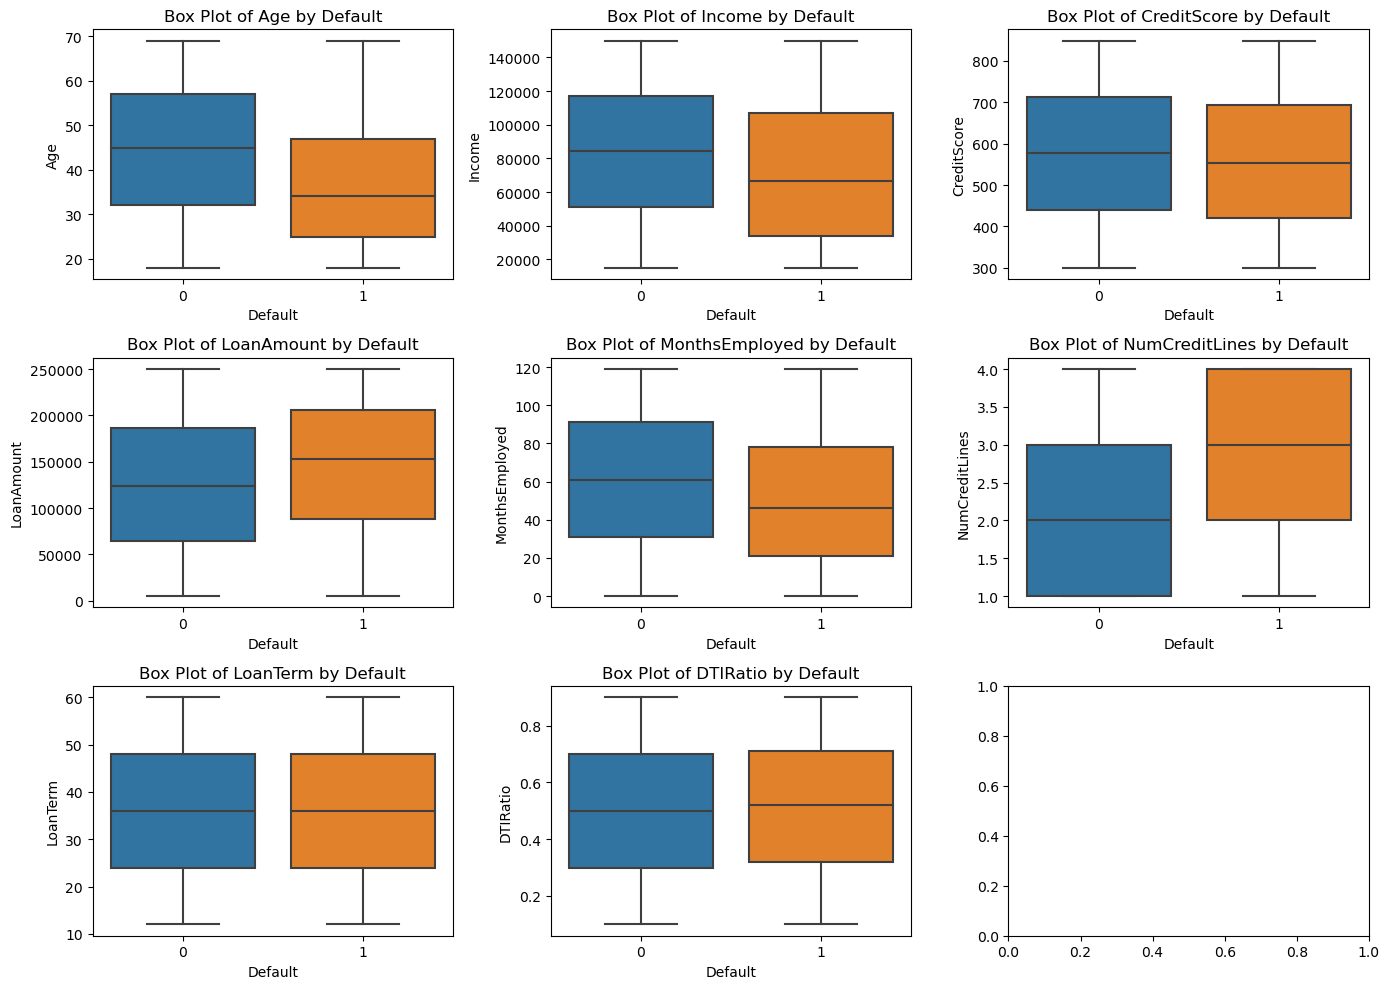

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Default', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Default')
    axes[i].set_xlabel('Default')
    plt.tight_layout()
    
    

In [13]:
df.drop(['LoanTerm','DTIRatio'],axis=1,inplace=True)

In [14]:
df['Default'] = df['Default'].replace({0: 'No Default', 1: 'Default'})
cat_columns = ['Education' ,'EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']

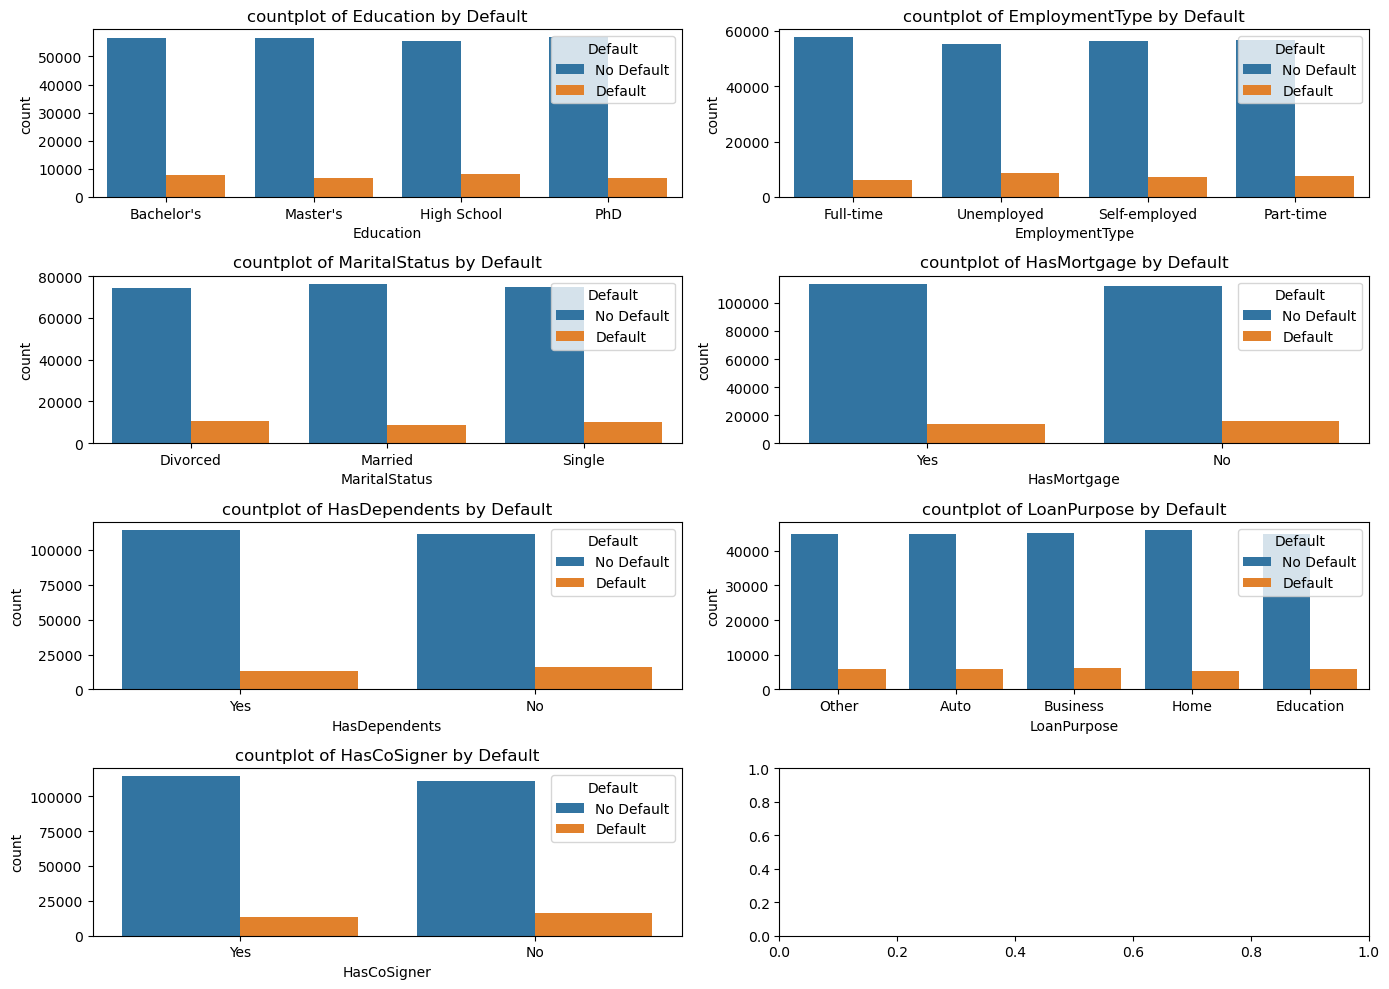

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(cat_columns):
    sns.countplot(data=df,x=col,hue='Default',ax=axes[i])
    axes[i].set_title(f'countplot of {col} by Default')
    axes[i].set_xlabel(col)
    plt.tight_layout()

# here we can see that there is no difference in the categoies of this features , so they will not be further help in prediction

In [16]:
df.drop(cat_columns,axis=1,inplace=True)

In [17]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,Default
0,56,85994,50587,520,80,4,15.23,No Default
1,69,50432,124440,458,15,1,4.81,No Default
2,46,84208,129188,451,26,3,21.17,Default
3,32,31713,44799,743,0,3,7.07,No Default
4,60,20437,9139,633,8,4,6.51,No Default


In [18]:
df['Default'] = df['Default'].replace({ 'No Default':0,'Default':1})

<Axes: >

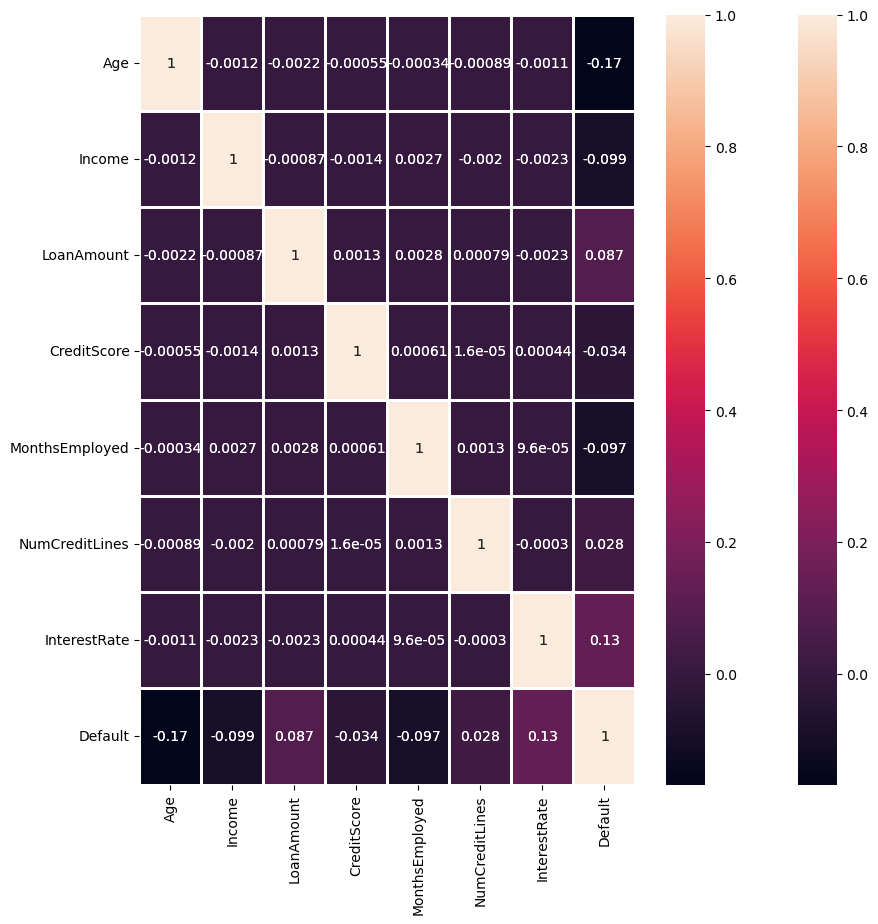

In [19]:
corr = df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)
sns.heatmap(corr,annot=True,linewidths=2,linecolor='white')


In [20]:
x = df.drop('Default',axis=1)
y = df[['Default']]
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
from imblearn.over_sampling import SMOTE

def build_model(model_name, model, x, y, test_size=0.3, random_state=42):
  # Use SMOTE for oversampling the minority class
  smote = SMOTE(random_state=random_state)
  x_train, y_train = smote.fit_resample(x, y)

  # Split data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_size, random_state=random_state)

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc_score = accuracy_score(y_test, y_pred)
  f1_score_val = f1_score(y_test, y_pred)

  return [model_name, acc_score, f1_score_val]

In [22]:
build_model('XG',XGBClassifier(),x,y)

['XG', 0.847212683784163, 0.8351945962307435]